# Task 02 - BAYES
## Pattern Recognition and Machine Learning

In [2]:
%load_ext autoreload
%autoreload 2
# uncomment following for interactive matplotlib
# %matplotlib notebook
from bayes import *
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load data from *.npz files

In [3]:
data = np.load("data_33rpz_bayes.npz", allow_pickle=True)
Alphabet = data["alphabet"]
images_test = data["images_test"]
labels_test = data["labels_test"]
contA = {'Mean': 124.2625,
         'Sigma': 1434.45420083,
         'Prior': 0.61538462}
contC = {'Mean': -2010.98,
         'Sigma': 558.42857106,
         'Prior': 0.38461538}
discreteA = {'Prior': 0.6153846153846154,
             'Prob': np.array([0.0125, 0., 0., 0.0125, 0.025, 0.0125, 0.025, 0.0375, 0.075, 0.1, 0.2125, 0.1375, 0.15, 0.1, 0.0875, 0.0125, 0., 0., 0., 0., 0.])}
discreteC = {'Prior': 0.38461538461538464,
             'Prob': np.array([0., 0., 0., 0.02, 0.02, 0.22, 0.46, 0.16, 0.1, 0.02, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

## Discrete

In [4]:
W1 = np.array([[0, 1],
              [1, 0]])
W2 = np.array([[0, 5], 
               [1, 0]])

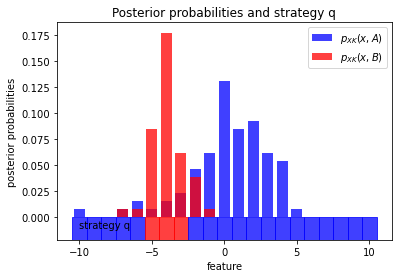

In [5]:
q_discrete1 = find_strategy_discrete(discreteA, discreteC, W1)

visualize_discrete(discreteA, discreteC, q_discrete1)
plt.savefig("classif_W1.png") 

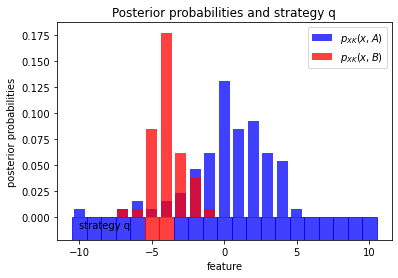

In [6]:
q_discrete2 = find_strategy_discrete(discreteA, discreteC, W2)

visualize_discrete(discreteA, discreteC, q_discrete2)
plt.savefig("classif_W2.png")

In [7]:
R_discrete = bayes_risk_discrete(discreteA, discreteC, W1, q_discrete1)
print(type(R_discrete))

# result not used, inspect the values e.g. with hist function
measurements_discrete = compute_measurement_lr_discrete(images_test)

# result not used, inspect the values 
labels_estimated_discrete = classify_discrete(images_test, q_discrete1)

error_discrete = classification_error_discrete(images_test, labels_test, q_discrete1)
print('Discrete classification error: {}'.format(error_discrete))

<class 'float'>
Discrete classification error: 0.225


#### Visualisation

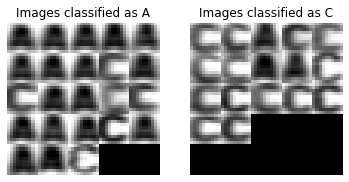

In [8]:
I_A = images_test[:,:,labels_estimated_discrete == 0]
I_C = images_test[:,:,labels_estimated_discrete == 1]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(montage(I_A), cmap='gray')
plt.title('Images classified as A')
plt.subplot(1, 2, 2)
plt.imshow(montage(I_C), cmap='gray')
plt.title('Images classified as C')
plt.savefig("decision_discrete.png")

## Continuos

{'t1': -3535.997150276402, 't2': -1248.7684903033442, 'decision': array([0, 1, 0], dtype=int32)}
Bayes risk: 0.135192816867571
Classify: [0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1
 1 1 1]
Continuous classification error: 0.1


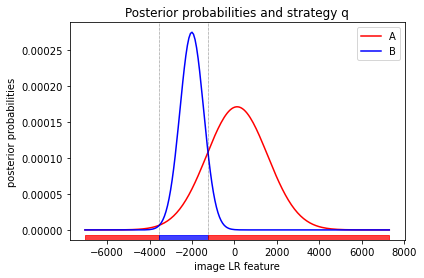

In [9]:

# we are searching for bayesian strategy for 2 normal distributions and
# zero-one cost function
W = np.array([[0, 1],
              [1, 0]])

# result not used, inspect the values e.g. with hist function
measurements_cont = compute_measurement_lr_cont(images_test)

q_cont = find_strategy_2normal(contA, contC)
print(q_cont)
visualize_2norm(contA, contC, q_cont)
plt.savefig("thresholds.png")

R_cont = bayes_risk_2normal(contA, contC, q_cont)
print('Bayes risk: {}'.format(R_cont))

labels_estimated_cont = classify_2normal(images_test, q_cont)
print('Classify: {}'.format(labels_estimated_cont))

error_cont = classification_error_2normal(images_test, labels_test, q_cont)

print('Continuous classification error: {}'.format(error_cont))

#### Visualisation

In [ ]:
I_A_cont = images_test[:,:,labels_estimated_cont == 0]
I_C_cont = images_test[:,:,labels_estimated_cont == 1]

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(montage(I_A_cont), cmap='gray')
plt.title('Images classified as A')

plt.subplot(1, 2, 2)
plt.imshow(montage(I_C_cont), cmap='gray')
plt.title('Images classified as C')

plt.savefig("decision_2normal.png")


